In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import RandomOverSampler

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ros = RandomOverSampler(random_state=0)

In [4]:
res.resample_directory(ros, path, 'ROS', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ROS/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

# Generate Dataset from image data

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ROS/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s=49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 50)

Epoch 1/50
163/163 [==============================] - 16s 98ms/step - loss: 0.4179 - tp: 4136.0000 - fp: 1039.0000 - tn: 4177.0000 - fn: 1080.0000 - accuracy: 0.7969 - precision: 0.7992 - recall: 0.7929 - auc: 0.8886 - val_loss: 0.3125 - val_tp: 266.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 38.0000 - val_accuracy: 0.9062 - val_precision: 0.9333 - val_recall: 0.8750 - val_auc: 0.9570
Epoch 2/50
163/163 [==============================] - 15s 89ms/step - loss: 0.2637 - tp: 4605.0000 - fp: 557.0000 - tn: 4607.0000 - fn: 559.0000 - accuracy: 0.8919 - precision: 0.8921 - recall: 0.8918 - auc: 0.9573 - val_loss: 0.2532 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9922
Epoch 3/50
163/163 [==============================] - 13s 80ms/step - loss: 0.2292 - tp: 4736.0000 - fp: 462.0000 - tn: 4754.0000 - fn: 480.0000 - accuracy: 0.9097 - precision: 0.9111 - recall: 0.9080 - auc: 0.

163/163 [==============================] - 13s 81ms/step - loss: 0.1266 - tp: 4944.0000 - fp: 243.0000 - tn: 4947.0000 - fn: 246.0000 - accuracy: 0.9529 - precision: 0.9532 - recall: 0.9526 - auc: 0.9894 - val_loss: 0.1758 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9844
Epoch 22/50
163/163 [==============================] - 13s 79ms/step - loss: 0.1092 - tp: 4985.0000 - fp: 210.0000 - tn: 4980.0000 - fn: 205.0000 - accuracy: 0.9600 - precision: 0.9596 - recall: 0.9605 - auc: 0.9915 - val_loss: 0.3013 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9414
Epoch 23/50
163/163 [==============================] - 13s 79ms/step - loss: 0.1274 - tp: 4946.0000 - fp: 251.0000 - tn: 4939.0000 - fn: 244.0000 - accuracy: 0.9523 - precision: 0.9517 - recall: 0.9530 - auc: 0.9892 - val_

Epoch 42/50
163/163 [==============================] - 13s 81ms/step - loss: 0.0814 - tp: 5061.0000 - fp: 154.0000 - tn: 5062.0000 - fn: 155.0000 - accuracy: 0.9704 - precision: 0.9705 - recall: 0.9703 - auc: 0.9957 - val_loss: 0.3914 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9453
Epoch 43/50
163/163 [==============================] - 13s 77ms/step - loss: 0.0917 - tp: 5021.0000 - fp: 173.0000 - tn: 5017.0000 - fn: 169.0000 - accuracy: 0.9671 - precision: 0.9667 - recall: 0.9674 - auc: 0.9941 - val_loss: 0.3513 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9355
Epoch 44/50
163/163 [==============================] - 13s 79ms/step - loss: 0.0909 - tp: 5033.0000 - fp: 162.0000 - tn: 5028.0000 - fn: 157.0000 - accuracy: 0.9693 - precision: 0.9688 - recall: 0.9697 - auc: 0

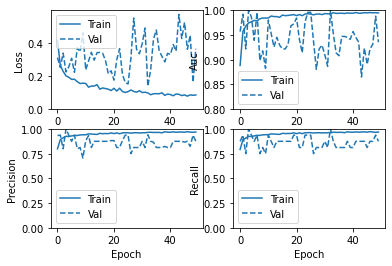

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.84      0.79      0.82       234
   PNEUMONIA       0.88      0.91      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



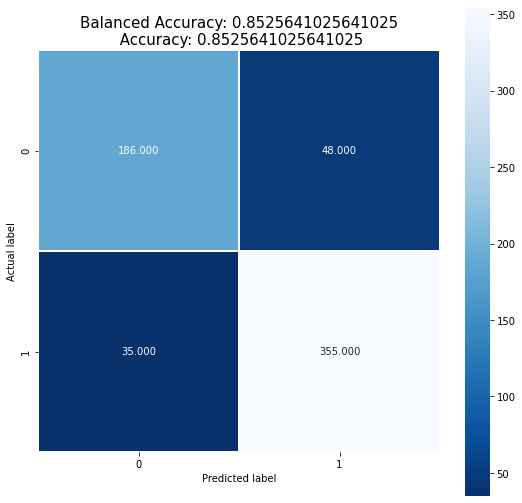

In [13]:
cnn.display_confusion_matrix(test_set)